In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16890945574666934031, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1540587299128943687
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12893123630977470921
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11150726272
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16684153037845566991
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
! git clone https://github.com/MyGreenSlime/Deeplearning_finalproject.git

fatal: destination path 'Deeplearning_finalproject' already exists and is not an empty directory.


In [0]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, array_to_img,ImageDataGenerator,img_to_array
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,UpSampling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization,AveragePooling2D
from scipy.ndimage.interpolation import rotate
import matplotlib.pyplot as plt

In [0]:
BasePath = "./Deeplearning_finalproject/PokemonData/"
AllPokemonKinds = os.listdir(BasePath)

In [0]:
imgs = []
dim = (64,64)
for ind,kind in enumerate(AllPokemonKinds):
    PokemonPics = os.listdir(BasePath+kind)
    print(ind,kind)
    for picname in PokemonPics:    
        try:
          img = load_img(BasePath+kind+"/"+picname)
          img = img_to_array(img)
          #------------------------------------------------------------------
          img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
          imgs.append(img_resized)
          #------------------------------------------------------------------   
        except:
            print("error", picname)
            continue

0 Jigglypuff
1 Vulpix
2 Omanyte
3 Seadra
4 Snorlax
5 Ekans
6 Magneton
error 45e434d002bd44eeb1acbc2decc8ee0f.svg
7 Diglett
8 Seel
9 Chansey
10 Cloyster
error ff270ebfab0f46b3b05c3fecd6a15ef9.svg
11 Doduo
12 Golbat
13 Pidgey
14 Slowbro
15 Kadabra
16 Psyduck
17 Porygon
18 Nidorino
19 Voltorb
20 Exeggutor
error 2b8bc491c5ca4e788999f8ea53617638.svg
error f29b4f9fccff4055b167ece6556143cd.svg
21 Rhyhorn
22 Vaporeon
23 Eevee
24 Arbok
25 Ivysaur
26 Gyarados
27 Rattata
28 Slowpoke
29 Onix
30 Graveler
error 3fe3c6a0bbd14de89092d2c675f743c1.svg
31 Weezing
32 Zapdos
error c99b2d19544c4cbbacd7711ade660279.svg
33 Machop
34 Gengar
35 Scyther
error a8734f10941a4deb95fcf7388e4fe8e2.svg
36 Tentacool
37 Paras
38 Parasect
39 Koffing
40 Meowth
41 Charmeleon
42 Dugtrio
43 Dragonite
44 Flareon
45 Poliwrath
46 Raticate
47 Staryu
48 Alakazam
49 Raichu
50 Kangaskhan
51 Pidgeotto
52 Zubat
53 Clefairy
54 Mewtwo
55 Abra
56 Kakuna
57 Grimer
58 Pinsir
59 Rapidash
60 Bulbasaur
61 Spearow
62 Horsea
63 Nidoking
64 Prim

In [0]:
imgs = np.array(imgs)
print(imgs.shape)

(6825, 64, 64, 3)


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(imgs, test_size = 0.3 , random_state = 99)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [0]:
X_train.shape

(4777, 64, 64, 3)

In [0]:
def GenModel(X_train):
  autoencoder = tf.keras.models.Sequential()

  # Let's build the encoder CNN
  autoencoder.add(Conv2D(128, (3,3), strides=1, padding="same", input_shape=X_train.shape[1:]))
  autoencoder.add(BatchNormalization())
  autoencoder.add(Activation('relu'))
  autoencoder.add(AveragePooling2D((2,2), padding="same"))
  autoencoder.add(Conv2D(64, (3,3), strides=1, padding="same"))
  autoencoder.add(BatchNormalization())
  autoencoder.add(Activation('relu'))
  autoencoder.add(AveragePooling2D((2,2), padding="same"))
  autoencoder.add(Conv2D(32, (3,3), strides=1, padding="same"))
  autoencoder.add(BatchNormalization())
  autoencoder.add(Activation('relu'))
  autoencoder.add(AveragePooling2D((2,2), padding="same"))

  # Let's build the decoder CNN 
  autoencoder.add(BatchNormalization())
  autoencoder.add(Activation('relu'))
  autoencoder.add(UpSampling2D((2, 2)))

  autoencoder.add(Conv2D(64, (3,3), strides=1, padding="same"))
  autoencoder.add(BatchNormalization())
  autoencoder.add(Activation('relu'))

  autoencoder.add(Conv2D(64, (3,3), strides=1, padding="same"))
  autoencoder.add(BatchNormalization())
  autoencoder.add(Activation('relu'))
  
  autoencoder.add(UpSampling2D((2, 2)))

  autoencoder.add(Conv2D(128, (3,3), strides=1, padding="same"))
  autoencoder.add(BatchNormalization())
  autoencoder.add(Activation('relu'))
  
  autoencoder.add(Conv2D(128, (3,3), strides=1, padding="same"))
  autoencoder.add(BatchNormalization())
  autoencoder.add(Activation('relu'))

  autoencoder.add(UpSampling2D((2, 2)))

  autoencoder.add(Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))
  autoencoder.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=0.01))
  return autoencoder

In [0]:
model = GenModel(X_train)

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 128)       3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 128)       512       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 128)       0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0

In [0]:
model.fit(X_train, X_train, batch_size = 100 , epochs = 10, validation_data = (X_test, X_test), verbose = 1)

Epoch 1/10
48/48 [==============================] - 12s 248ms/step - loss: 0.0533 - val_loss: 0.2345
Epoch 2/10
48/48 [==============================] - 10s 206ms/step - loss: 0.0262 - val_loss: 0.1714
Epoch 3/10
48/48 [==============================] - 10s 205ms/step - loss: 0.0225 - val_loss: 0.0672
Epoch 4/10
48/48 [==============================] - 10s 206ms/step - loss: 0.0194 - val_loss: 0.0412
Epoch 5/10
48/48 [==============================] - 10s 206ms/step - loss: 0.0178 - val_loss: 0.0370
Epoch 6/10
48/48 [==============================] - 10s 206ms/step - loss: 0.0159 - val_loss: 0.0305
Epoch 7/10
48/48 [==============================] - 10s 206ms/step - loss: 0.0148 - val_loss: 0.0260
Epoch 8/10
48/48 [==============================] - 10s 206ms/step - loss: 0.0139 - val_loss: 0.0266
Epoch 9/10
48/48 [==============================] - 10s 206ms/step - loss: 0.0134 - val_loss: 0.0223
Epoch 10/10
48/48 [==============================] - 10s 206ms/step - loss: 0.0129 - val_lo

In [0]:
predicted = model.predict(X_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


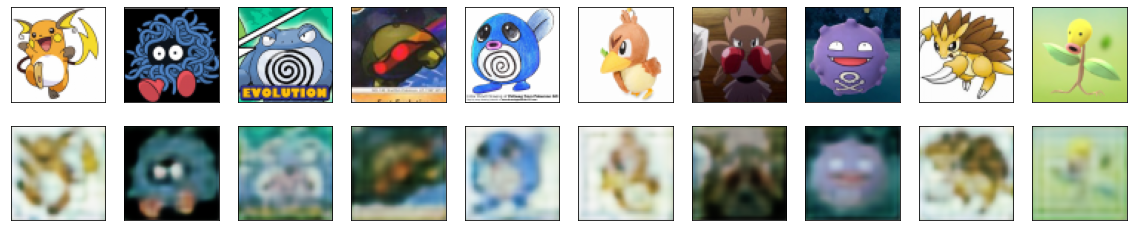

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test[20:30], predicted[20:30]], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((64, 64, 3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [0]:
from tensorflow.keras.models import Model

**Encoder Part**

In [0]:
EncoderPart = Model(inputs=model.input, outputs = model.get_layer("average_pooling2d_2").output)

In [0]:
EncoderOutput = EncoderPart.predict(X_test)

In [0]:
EncoderPart.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 128)       3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 128)       512       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 128)       0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256   

In [0]:
EncoderOutput[0].shape

(8, 8, 32)

**Decoder Part**


In [0]:
from tensorflow.keras.layers import Input

In [0]:
Decoder_input = Input(model.layers[12].input_shape[1:])
DecoderPart = Decoder_input
for layer in model.layers[12:]:
    DecoderPart = layer(DecoderPart)
DecoderPart = Model(inputs=Decoder_input, outputs=DecoderPart)

In [0]:
DecoderPart.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8, 8, 32)]        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 8, 8, 32)          128       
_________________________________________________________________
activation_3 (Activation)    (None, 8, 8, 32)          0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
activation_4 (Activation)    (None, 16, 16, 64)        0   

In [0]:
DecoderOutput = DecoderPart.predict(EncoderOutput)

In [0]:
DecoderOutput[0].shape

(64, 64, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


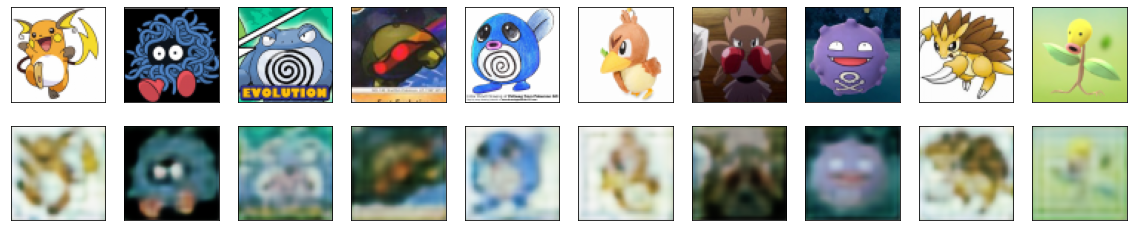

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test[20:30], DecoderOutput[20:30]], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((64, 64, 3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)